In [77]:
import pandas as pd
df = pd.read_csv('/Users/timurarutunan/Downloads/stud_math.csv')
df.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [78]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [79]:
df.fillna(-1, inplace = True)

In [80]:
def process(df, col):
    unique_data = df[col].unique()
    mapping = {unique_data[i]: i for i in range (len(unique_data))}
    df[col] = df[col].map(mapping) 
    return mapping

In [81]:
process(df, 'sex')

{'F': 0, 'M': 1}

In [82]:
process(df, 'address')

{'U': 0, -1: 1, 'R': 2}

In [83]:
df.loc[df['address'] == 1,'address'] = -1

In [84]:
process(df, 'famsize')

{-1: 0, 'GT3': 1, 'LE3': 2}

In [85]:
df.loc[df['famsize'] == 0,'famsize'] = -1

In [86]:
process(df, 'Pstatus')

{'A': 0, -1: 1, 'T': 2}

In [87]:
df.loc[df['Pstatus'] == 1,'Pstatus'] = -1

In [88]:
process(df, 'Medu')

{4.0: 0, 1.0: 1, 3.0: 2, 2.0: 3, -1.0: 4, 0.0: 5}

In [89]:
df.loc[df['Medu'] == 4, 'Medu'] = -1

In [90]:
process(df, 'Fedu')

{4.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 40.0: 4, -1.0: 5, 0.0: 6}

In [91]:
df.loc[df['Fedu'] == 5, 'Fedu'] = -1

In [92]:
process(df, 'Mjob')

{'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4, -1: 5}

In [93]:
df.loc[df['Mjob'] == 5, 'Mjob'] = -1

In [94]:
process(df, 'Fjob')

{'teacher': 0, 'other': 1, -1: 2, 'health': 3, 'services': 4, 'at_home': 5}

In [95]:
df.loc[df['Fjob'] == 2, 'Fjob'] = -1

In [96]:
process(df, 'reason')

{'course': 0, 'other': 1, 'home': 2, 'reputation': 3, -1: 4}

In [97]:
df.loc[df['reason'] == 4, 'reason'] = -1

In [98]:
process(df, 'guardian')

{'mother': 0, 'father': 1, 'other': 2, -1: 3}

In [99]:
df.loc[df['guardian'] == 3, 'guardian'] = -1

In [100]:
process(df, 'schoolsup')

{'yes': 0, 'no': 1, -1: 2}

In [101]:
df.loc[df['schoolsup'] == 2, 'schoolsup'] = -1

In [102]:
process(df, 'famsup')

{'no': 0, 'yes': 1, -1: 2}

In [103]:
df.loc[df['famsup'] == 2, 'famsup'] = -1

In [104]:
process(df, 'paid')

{'no': 0, -1: 1, 'yes': 2}

In [105]:
df.loc[df['paid'] == 1, 'paid'] = -1

In [106]:
process(df, 'activities')

{'no': 0, 'yes': 1, -1: 2}

In [107]:
df.loc[df['activities'] == 2, 'activities'] = -1

In [108]:
process(df, 'nursery')

{'yes': 0, 'no': 1, -1: 2}

In [109]:
df.loc[df['nursery'] == 2, 'nursery'] = -1

In [110]:
process(df, 'higher')

{'yes': 0, -1: 1, 'no': 2}

In [111]:
df.loc[df['higher'] == 1, 'higher'] = -1

In [113]:
process(df, 'internet')

{-1: 0, 'yes': 1, 'no': 2}

In [114]:
df.loc[df['internet'] == 0, 'internet'] = -1

In [115]:
process(df, 'romantic')

{'no': 0, -1: 1, 'yes': 2}

In [117]:
df.loc[df['romantic'] == 1, 'romantic'] = -1

<AxesSubplot:>

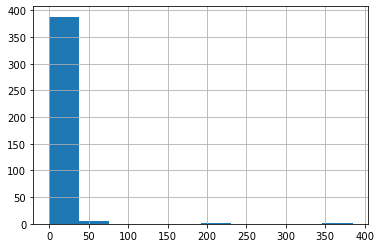

In [119]:
import matplotlib.pyplot as plt
df['absences'].hist()

In [123]:
import numpy as np
iqr = df['absences'].quantile(0.75) - df['absences'].quantile(0.25)
iqr

8.0

In [125]:
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)

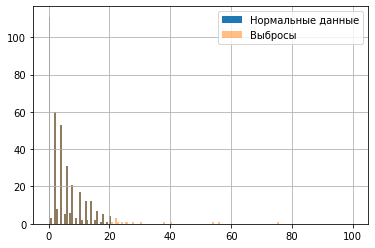

In [129]:
df.absences.loc[df.absences.between(
perc25 - 1.5*iqr,
perc75 + 1.5*iqr)].hist(bins = 160, range = (0, 100), label = 'Нормальные данные')
 
df.absences.loc[df.absences <= 100].hist(
alpha = 0.5, bins = 160, range = (0, 100), label = 'Выбросы')
 
plt.legend()

In [130]:
'По графику видно, что студенты-выбросы - те, кто проспустил больше 20 занятий'

'По графику видно, что студенты-выбросы - те, кто проспустил больше 20 занятий'

In [132]:
df = df.loc[df['absences'] < 20]

In [133]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,0,18,0,-1,0,0,0,0,0,...,-6.0,0,-1,0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,0,17,0,1,-1,1,1,0,1,...,-6.0,0,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,0,15,0,2,2,1,1,0,1,...,-6.0,0,1,-1,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,0,15,0,1,2,0,2,1,-1,...,-9.0,0,1,2,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,0,16,0,1,2,2,3,2,1,...,-6.0,0,2,0,4.0,3.0,2.0,5.0,4.0,50.0


 Я выбрал самые интересные дисциплины для анализа, так как самих дисциплин слишком много и рассматривать все было бы нерационально

<AxesSubplot:>

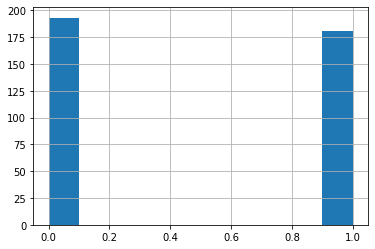

In [140]:
df['sex'].hist()

Мужчин с женщинами примерно одинаковое количество - около 200

<AxesSubplot:>

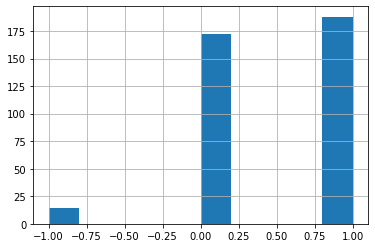

In [141]:
df['activities'].hist()

В основном студенты занимаются внеучебной деятельностью, около 10 человек не дали ответа

<AxesSubplot:>

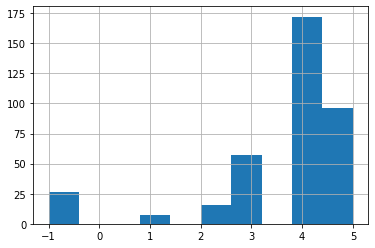

In [142]:
df['famrel'].hist()

Около 25 человек не дали ответа, в основном у студентов либо удовлетворительные отношения в семье, либо отличные. Имеется лишь несколько студентов с плохими отношениями

<AxesSubplot:>

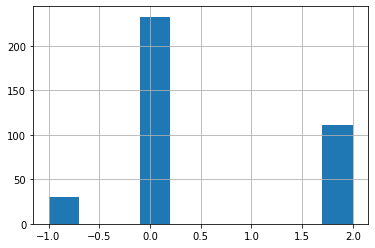

In [143]:
df['romantic'].hist()

Несколько студентов воздержались от ответа, но в основном в отношениях состоит примерно 30 процентов

<AxesSubplot:>

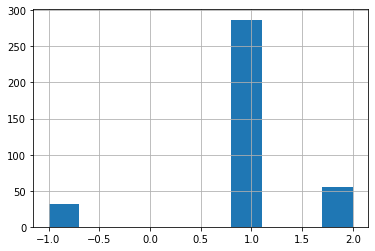

In [144]:
df['internet'].hist()

По статистике, несколько человек воздержались от ответа, у 80 процентов студентов имеется доступ к интернету

In [145]:
np.corrcoef(df['age'], df['absences'])

array([[1.        , 0.11784391],
       [0.11784391, 1.        ]])

Так как коэффицент корреляции 11 процентов, можно сделать вывод, что количество прогулов не зависит от возраста

In [153]:
np.corrcoef(df['score'], df['absences'])

array([[1.        , 0.06700556],
       [0.06700556, 1.        ]])

Также, можно заметить, что количество прогулов не влияет на оценки

In [149]:
np.corrcoef(df['age'], df['score'])

array([[1.        , 0.13510552],
       [0.13510552, 1.        ]])

Как ни странно, оценки у данной выборки студентов не зависят и от возраста

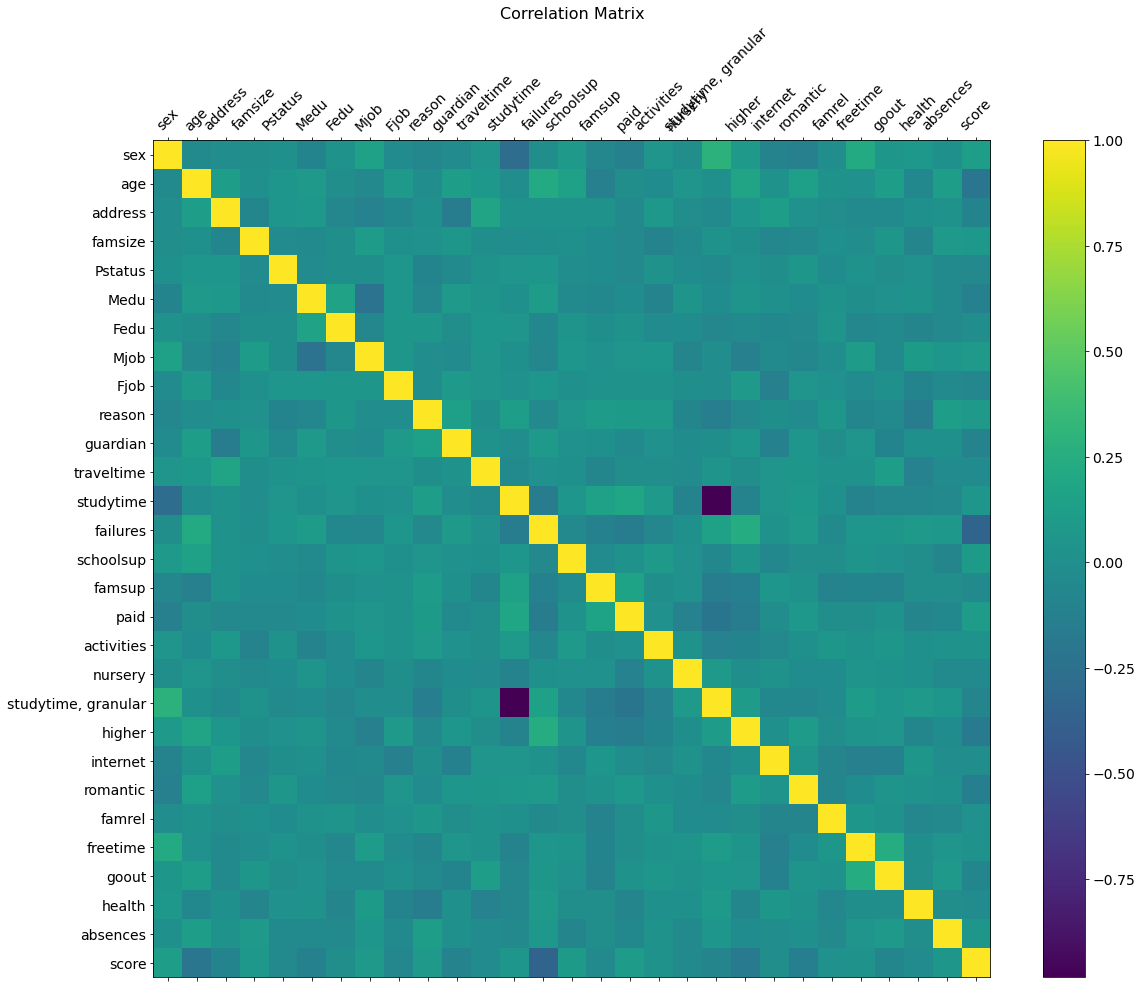

In [154]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

Исходя из данного графика, можно сделать вывод, что studytime, granular - studytime с отрицательным знаком. Важно отметить, что неудачи имеют негативную корреляцию с оценками. Имеется странное наблюдение, что время, потраченное на занятия, практически не зависит от свободного времени. В конце концов, не имеют корреляции и желание студентов получить высшее образование и их успеваемость... Касательно последнего пункта итогового задания(не исключен неправильный анализ с моей стороны), в датасете практически не имеется дисциплин, влияющих на успеваемость.